In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization,Conv2D,MaxPooling2D,Activation,Dropout,Dense,Flatten,Input,Bidirectional,LSTM,MaxPool2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, balanced_accuracy_score, classification_report
import keras
import tensorflow as tf
from keras.layers import Dense, SimpleRNN, LSTM, TimeDistributed, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.show()

In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\G_TRAIN.csv')
df

,-0.55307,-13.949,7.2276,0.81332,0.81042,0.57891,0.057156,0.30691,-0.28209,0.34901,...,-1.2757e-05,-1.791e-05,0.00014175,0.00018104,2.7085e-05,1.9801e-05,1.6102e-05,1.5949e-05,-1.783e-05,0
0,-0.33518,-14.134,7.3409,0.99856,0.87461,0.80615,-0.024650,0.17291,-0.331390,0.296080,...,0.000242,0.000437,0.000095,-0.000089,-0.000200,0.000036,0.000073,2.032200e-04,0.000179,0
1,-0.53979,-14.600,7.5290,1.25120,0.65054,0.73118,0.036801,0.25653,-0.289080,0.337880,...,0.000097,0.000036,0.000028,0.000031,0.000075,0.000067,0.000049,5.168800e-07,0.000017,0
2,-0.96780,-15.274,7.1488,1.34540,0.83254,0.91121,0.125130,0.32822,-0.290950,0.342770,...,-0.000004,-0.000021,-0.000116,-0.000025,-0.000018,0.000013,-0.000015,-2.219200e-05,-0.000059,0
3,1.12280,-12.564,7.0406,0.93019,1.26220,0.11738,0.570680,0.26390,0.138620,0.787870,...,-0.000087,-0.000079,-0.000082,0.000076,0.000107,0.000125,0.000071,1.084600e-04,0.000044,0
4,1.32150,-12.240,6.9704,0.70072,1.24620,0.18263,0.550100,0.16563,0.112470,0.827640,...,-0.000053,0.000042,0.000135,0.000108,0.000032,-0.000088,-0.000079,-1.406000e-05,-0.000073,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,-6.87800,-19.030,3.4972,0.62311,0.45905,0.49920,0.092995,0.17074,-0.152760,0.087835,...,0.000094,0.000196,0.000139,0.000110,0.000007,-0.000074,-0.000023,6.846800e-06,-0.000093,2
7519,-7.18810,-19.168,3.3892,0.62209,0.47292,0.49791,0.094041,0.19643,-0.106620,0.125620,...,0.000074,-0.000006,0.000001,0.000045,0.000014,-0.000071,-0.000096,-6.001700e-05,-0.000132,2
7520,-7.21280,-19.147,3.4621,0.66061,0.39095,0.43684,0.136610,0.22249,-0.165220,0.065559,...,0.000078,0.000066,0.000048,-0.000059,-0.000062,-0.000013,-0.000065,-6.587000e-05,0.000004,2
7521,-6.92500,-19.096,3.5545,0.75446,0.40096,0.36889,0.082292,0.18993,-0.187880,0.074205,...,-0.000164,-0.000120,-0.000009,0.000020,0.000051,0.000129,0.000142,1.125700e-04,0.000012,2


In [3]:
X = df.iloc[:, 0:43].values
y = df.iloc[:,-1].values

In [4]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

In [5]:
y=y.astype(int)

In [6]:
X.shape

(7523, 43)

In [9]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
x = 323489  // 43
x
X=X.reshape(7523, 43,1)

In [8]:
import numpy as np
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [11]:
regressor = keras.models.Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (43, 1)))

#regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (67, 1)))

regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

#regressor.fit(X_train, y_train, validation_data= (X_test,y_test),epochs = 50, batch_size = 32)
regressor.fit(X, y, epochs = 50, batch_size = 10)




Epoch 1/50
753/753 [==============================] - 40s 47ms/step - loss: 0.3541 - accuracy: 0.4902
Epoch 2/50
753/753 [==============================] - 37s 49ms/step - loss: 0.0611 - accuracy: 0.5776
Epoch 3/50
753/753 [==============================] - 42s 56ms/step - loss: 0.0266 - accuracy: 0.5875
Epoch 4/50
753/753 [==============================] - 48s 64ms/step - loss: 0.0177 - accuracy: 0.5877
Epoch 5/50
753/753 [==============================] - 48s 64ms/step - loss: 0.0146 - accuracy: 0.5877
Epoch 6/50
753/753 [==============================] - 48s 64ms/step - loss: 0.0128 - accuracy: 0.5877
Epoch 7/50
753/753 [==============================] - 49s 64ms/step - loss: 0.0116 - accuracy: 0.5877
Epoch 8/50
753/753 [==============================] - 49s 66ms/step - loss: 0.0104 - accuracy: 0.5877
Epoch 9/50
753/753 [==============================] - 49s 65ms/step - loss: 0.0098 - accuracy: 0.5877
Epoch 10/50
753/753 [==============================] - 49s 64ms/step - loss: 0.008

In [16]:
import pandas as pd
dtf=pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\G_TEST.csv')
dtf
Xt = dtf.iloc[:, 0:43].values

yt = dtf.iloc[:,-1].values

In [17]:
import numpy as np
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [18]:
# predict_x=regressor.predict(Xt) 

# classes_x=np.argmax(predict_x,axis=1)
prediction1=regressor.predict(Xt)
prediction1=regressor.predict((Xt) > 0.5).astype("int32")

In [19]:
score=regressor.evaluate(Xt, yt)
print("%s: %.2f%%" % (regressor.metrics_names[1], score[1]*100))


333/333 [==============================] - 8s 21ms/step - loss: 0.0010 - accuracy: 1.0000
accuracy: 100.00%


In [20]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

# import numpy as np
# from sklearn.metrics import roc_curve

# results=confusion_matrix(yt, prediction1)
# print("confusion matrix", results)

# accuracy = accuracy_score(yt, prediction1)
# print('Accuracy: %f' % accuracy)

# precision = precision_score(yt, prediction1)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(yt, prediction1)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(yt, prediction1)
# print('F1 score: %f' % f1)

# fpr, tpr, threshold = roc_curve(yt,prediction1, pos_label=1)
# fnr = 1 - tpr
# eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
# EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
# print(eer_threshold)
# print("EER = ", EER)

from sklearn.metrics import accuracy_score
test_acc = accuracy_score(yt, prediction1)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(yt, prediction1))





The Accuracy for Test Set is 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3276
           1       1.00      1.00      1.00      7354

    accuracy                           1.00     10630
   macro avg       1.00      1.00      1.00     10630
weighted avg       1.00      1.00      1.00     10630



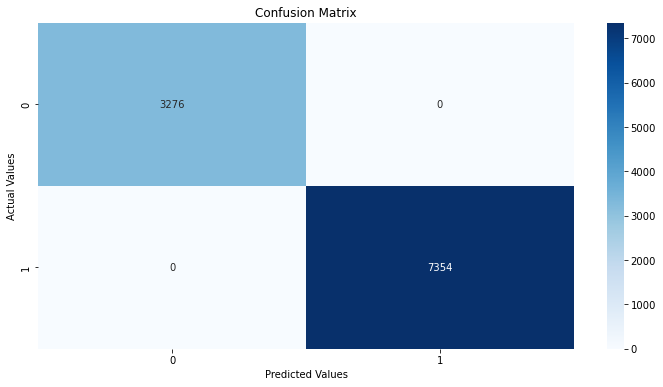

In [21]:
cm=confusion_matrix(yt, prediction1)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(yt, prediction1, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print(eer_threshold)
print("EER = ", EER)

1
EER =  0.0
